## Python program using NumPy that implements three different neural networks:

- No Hidden Layer: Logistic regression-like model.
- One Hidden Layer: Single-layer neural network with ReLU activation.
- Two Hidden Layers: Two-layer neural network with ReLU activation for hidden layers.

Each implementation includes forward and backward propagation. The models are trained using the gradient descent algorithm. The code is vectorized using NumPy to improve performance.

This program demonstrates:

- Initialization of weights and biases for different network configurations.
- Forward propagation for computing activations layer-by-layer.
- Backward propagation for calculating gradients and updating weights.
- Training and prediction for evaluating the model.

You can modify the number of layers and nodes in the network by adjusting the layers and activations variables. The training example uses a simple circle pattern for classification.

In [1]:
from IPython.display import clear_output

In [2]:
# Install the necessary packages
%pip install numpy matplotlib

clear_output()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Methods Used:
Some of the methods used in this program are:
- `initialize_parameters`: Initializes weights and biases for each layer.
- `sigmoid`: Computes the sigmoid activation function.
- `relu`: Computes the ReLU activation function.
- `forward_propagation`: Computes the forward propagation for the network.
- `compute_cost`: Computes the cross-entropy loss.
- `backward_propagation`: Computes the backward propagation for the network.
- `update_parameters`: Updates the weights and biases using the gradients.
- `train_model`: Trains the neural network using gradient descent.
- `predict`: Predicts the output for a given input.

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def initialize_weights(layers):
    weights = {}
    for i in range(len(layers) - 1):
        weights[f"W{i+1}"] = np.random.randn(layers[i], layers[i+1]) * 0.01
        weights[f"b{i+1}"] = np.zeros((1, layers[i+1]))
    return weights

def forward_propagation(X, weights, layers, activations):
    caches = {"A0": X}
    for i in range(1, len(layers)):
        Z = caches[f"A{i-1}"].dot(weights[f"W{i}"]) + weights[f"b{i}"]
        if activations[i-1] == "relu":
            A = relu(Z)
        elif activations[i-1] == "sigmoid":
            A = sigmoid(Z)
        caches[f"Z{i}"] = Z
        caches[f"A{i}"] = A
    return caches

def backward_propagation(Y, weights, caches, layers, activations):
    gradients = {}
    m = Y.shape[0]
    dA = -(Y / caches[f"A{len(layers)-1}"] - (1 - Y) / (1 - caches[f"A{len(layers)-1}"]))
    for i in range(len(layers) - 1, 0, -1):
        dZ = dA
        if activations[i-1] == "sigmoid":
            dZ *= sigmoid_derivative(caches[f"Z{i}"])
        elif activations[i-1] == "relu":
            dZ *= relu_derivative(caches[f"Z{i}"])
        gradients[f"dW{i}"] = caches[f"A{i-1}"].T.dot(dZ) / m
        gradients[f"db{i}"] = np.sum(dZ, axis=0, keepdims=True) / m
        dA = dZ.dot(weights[f"W{i}"].T)
    return gradients

def update_weights(weights, gradients, learning_rate):
    for key in weights.keys():
        weights[key] -= learning_rate * gradients[f"d{key}"]
    return weights

def train(X, Y, layers, activations, epochs=1000, learning_rate=0.01):
    weights = initialize_weights(layers)
    losses = []
    for epoch in range(epochs):
        caches = forward_propagation(X, weights, layers, activations)
        gradients = backward_propagation(Y, weights, caches, layers, activations)
        weights = update_weights(weights, gradients, learning_rate)
        if epoch % 100 == 0:
            loss = -np.mean(Y * np.log(caches[f"A{len(layers)-1}"]) + (1 - Y) * np.log(1 - caches[f"A{len(layers)-1}"]))
            losses.append(loss)
            print(f"Epoch {epoch}, Loss: {loss}")
    return weights, losses

def predict(X, weights, layers, activations):
    caches = forward_propagation(X, weights, layers, activations)
    predictions = caches[f"A{len(layers)-1}"] > 0.5
    return predictions

def plot_decision_boundary(X, Y, weights, layers, activations):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(grid, weights, layers, activations).reshape(xx.shape)
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

In [5]:

# Example Usage
np.random.seed(42)
X = np.random.randn(500, 2)  # 500 samples, 2 features
Y = (np.sum(X ** 2, axis=1) < 1).astype(int).reshape(-1, 1)  # Circle pattern


In [6]:
X

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [7]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

No Hidden Layer:
Epoch 0, Loss: 0.6929931971920149
Epoch 100, Loss: 0.6876269349248335
Epoch 200, Loss: 0.6843944196058585
Epoch 300, Loss: 0.6824428848846689
Epoch 400, Loss: 0.6812616725906565
Epoch 500, Loss: 0.6805449235566644
Epoch 600, Loss: 0.6801090218478043
Epoch 700, Loss: 0.6798434006879638
Epoch 800, Loss: 0.6796812716621525
Epoch 900, Loss: 0.6795821732855267


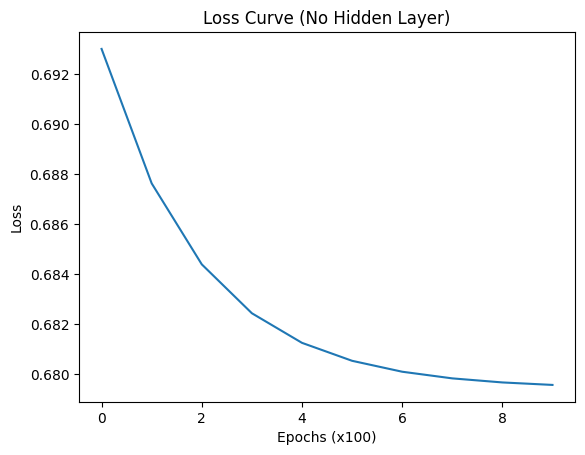

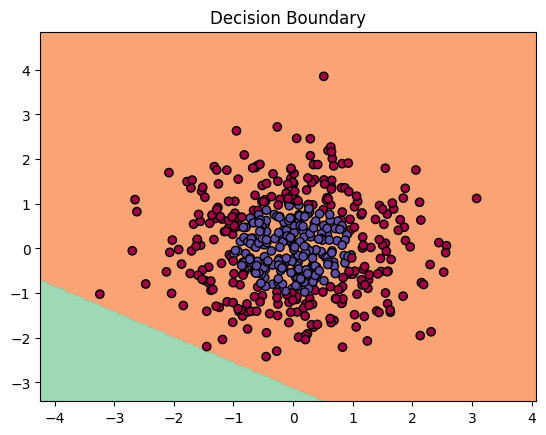

Accuracy: 0.578


In [10]:
print("No Hidden Layer:")
layers_no_hidden = [2, 1]
activations_no_hidden = ["sigmoid"]
weights_no_hidden, losses_no_hidden = train(X, Y, layers_no_hidden, activations_no_hidden)

plt.plot(losses_no_hidden)
plt.title("Loss Curve (No Hidden Layer)")
plt.xlabel("Epochs (x100)")
plt.ylabel("Loss")
plt.show()
plot_decision_boundary(X, Y, weights_no_hidden, layers_no_hidden, activations_no_hidden)

predictions = predict(X, weights_no_hidden, layers_no_hidden, activations_no_hidden)
accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy}")


One Hidden Layer:
Epoch 0, Loss: 0.6932079947608679
Epoch 100, Loss: 0.6883933827740197
Epoch 200, Loss: 0.6854719715632732
Epoch 300, Loss: 0.6836957717447419
Epoch 400, Loss: 0.6826119800184896
Epoch 500, Loss: 0.681951795417591
Epoch 600, Loss: 0.6815489538000141
Epoch 700, Loss: 0.6813013550405846
Epoch 800, Loss: 0.6811481239267294
Epoch 900, Loss: 0.6810529002824732


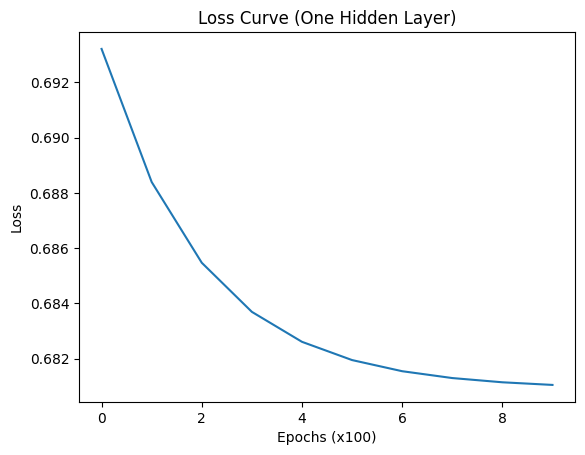

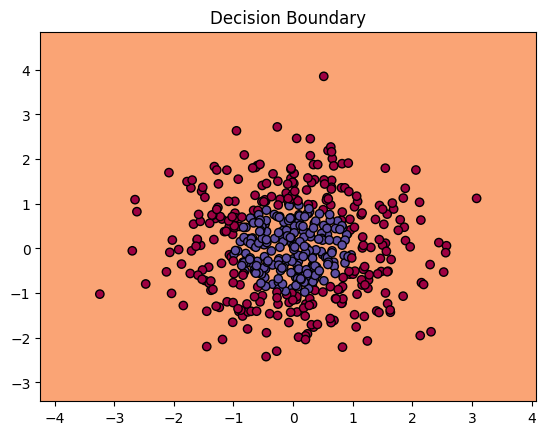

Accuracy: 0.578


In [11]:
print("\nOne Hidden Layer:")
layers_one_hidden = [2, 4, 1]
activations_one_hidden = ["relu", "sigmoid"]
weights_one_hidden, losses_one_hidden = train(X, Y, layers_one_hidden, activations_one_hidden)

plt.plot(losses_one_hidden)
plt.title("Loss Curve (One Hidden Layer)")
plt.xlabel("Epochs (x100)")
plt.ylabel("Loss")
plt.show()
plot_decision_boundary(X, Y, weights_one_hidden, layers_one_hidden, activations_one_hidden)

predictions = predict(X, weights_one_hidden, layers_one_hidden, activations_one_hidden)
accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy}")


Two Hidden Layers:
Epoch 0, Loss: 0.6931474067834108
Epoch 100, Loss: 0.6883545951924086
Epoch 200, Loss: 0.6854477950280812
Epoch 300, Loss: 0.6836825869799809
Epoch 400, Loss: 0.6826090455586244
Epoch 500, Loss: 0.6819551962397136
Epoch 600, Loss: 0.6815564339390581
Epoch 700, Loss: 0.6813129610514328
Epoch 800, Loss: 0.6811641594630441
Epoch 900, Loss: 0.6810731448129544


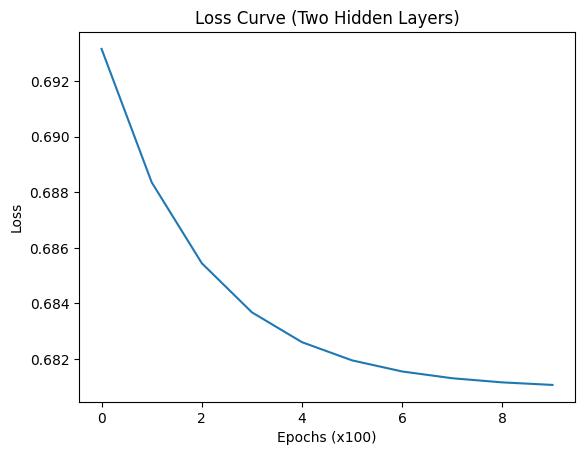

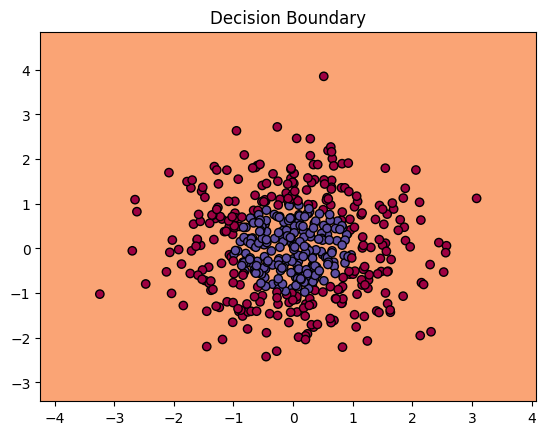

Accuracy: 0.578


In [12]:
print("\nTwo Hidden Layers:")
layers_two_hidden = [2, 4, 4, 1]
activations_two_hidden = ["relu", "relu", "sigmoid"]
weights_two_hidden, losses_two_hidden = train(X, Y, layers_two_hidden, activations_two_hidden)

plt.plot(losses_two_hidden)
plt.title("Loss Curve (Two Hidden Layers)")
plt.xlabel("Epochs (x100)")
plt.ylabel("Loss")
plt.show()
plot_decision_boundary(X, Y, weights_two_hidden, layers_two_hidden, activations_two_hidden)

predictions = predict(X, weights_two_hidden, layers_two_hidden, activations_two_hidden)
accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy}")